In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ulsan_fcst=pd.read_csv("ulsan_last_fcst.csv")

In [54]:
ulsan_fcst

,Temperature,Humidity,WindSpeed,WindDirection,Cloud,Forecast_time,Forecast time
0,8.0,20.0,14.0,298.0,2.0,2018-03-01 15:00:00,2018-03-01 11:00:00
1,4.0,20.0,4.3,298.0,2.0,2018-03-01 18:00:00,2018-03-01 14:00:00
2,3.0,30.0,2.1,313.0,2.0,2018-03-01 21:00:00,2018-03-01 17:00:00
3,0.0,40.0,1.3,321.0,2.0,2018-03-02 00:00:00,2018-03-01 20:00:00
4,-1.0,45.0,1.8,299.0,2.0,2018-03-02 03:00:00,2018-03-01 23:00:00
...,...,...,...,...,...,...,...
8783,9.0,45.0,3.1,83.0,3.0,2021-03-03 12:00:00,2021-03-01 08:00:00
8784,9.0,45.0,3.0,111.0,3.0,2021-03-03 15:00:00,2021-03-01 08:00:00
8785,8.0,55.0,2.2,122.0,3.0,2021-03-03 18:00:00,2021-03-01 08:00:00
8786,6.0,65.0,0.9,131.0,3.0,2021-03-03 21:00:00,2021-03-01 08:00:00


In [55]:
ulsan_fcst=ulsan_fcst[['Forecast_time','Temperature','Humidity','WindSpeed','WindDirection','Cloud']]
ulsan_fcst['Forecast_time']=pd.to_datetime(ulsan_fcst['Forecast_time'])
ulsan_fcst

<ipython-input-55-9c340b90160e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ulsan_fcst['Forecast_time']=pd.to_datetime(ulsan_fcst['Forecast_time'])


,Forecast_time,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2018-03-01 15:00:00,8.0,20.0,14.0,298.0,2.0
1,2018-03-01 18:00:00,4.0,20.0,4.3,298.0,2.0
2,2018-03-01 21:00:00,3.0,30.0,2.1,313.0,2.0
3,2018-03-02 00:00:00,0.0,40.0,1.3,321.0,2.0
4,2018-03-02 03:00:00,-1.0,45.0,1.8,299.0,2.0
...,...,...,...,...,...,...
8783,2021-03-03 12:00:00,9.0,45.0,3.1,83.0,3.0
8784,2021-03-03 15:00:00,9.0,45.0,3.0,111.0,3.0
8785,2021-03-03 18:00:00,8.0,55.0,2.2,122.0,3.0
8786,2021-03-03 21:00:00,6.0,65.0,0.9,131.0,3.0


In [56]:
ulsan_fcst_all=pd.DataFrame()  # 1시간단위로  기상예보값을 넣어줄 데이터 프레임 형성
ulsan_fcst_all['Forecast_time']=pd.date_range(start='2018-03-01 15:00:00', end='2021-03-01',freq='H')
ulsan_fcst_all

,Forecast_time
0,2018-03-01 15:00:00
1,2018-03-01 16:00:00
2,2018-03-01 17:00:00
3,2018-03-01 18:00:00
4,2018-03-01 19:00:00
...,...
26285,2021-02-28 20:00:00
26286,2021-02-28 21:00:00
26287,2021-02-28 22:00:00
26288,2021-02-28 23:00:00


In [57]:
# Forecast_time을 기준으로 기존의 예보 데이터프레임과 병합
ulsan_fcst_all = pd.merge(ulsan_fcst_all, ulsan_fcst, on='Forecast_time', how='outer')
ulsan_fcst_all.head(10)  # 기존의 예보 데이터 프레임에 없는 시간은 값이 비어있음을 알 수 있다.

,Forecast_time,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2018-03-01 15:00:00,8.0,20.0,14.0,298.0,2.0
1,2018-03-01 16:00:00,NaN,NaN,NaN,NaN,NaN
2,2018-03-01 17:00:00,NaN,NaN,NaN,NaN,NaN
3,2018-03-01 18:00:00,4.0,20.0,4.3,298.0,2.0
4,2018-03-01 19:00:00,NaN,NaN,NaN,NaN,NaN
5,2018-03-01 20:00:00,NaN,NaN,NaN,NaN,NaN
6,2018-03-01 21:00:00,3.0,30.0,2.1,313.0,2.0
7,2018-03-01 22:00:00,NaN,NaN,NaN,NaN,NaN
8,2018-03-01 23:00:00,NaN,NaN,NaN,NaN,NaN
9,2018-03-02 00:00:00,0.0,40.0,1.3,321.0,2.0


### 선형보간- pandas에서 지원하는 interpolate함수 사용

In [58]:
ulsan_fcst_all_inter=ulsan_fcst_all.interpolate()

In [59]:
ulsan_fcst_all_inter

,Forecast_time,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2018-03-01 15:00:00,8.000000,20.000000,14.000000,298.0,2.0
1,2018-03-01 16:00:00,6.666667,20.000000,10.766667,298.0,2.0
2,2018-03-01 17:00:00,5.333333,20.000000,7.533333,298.0,2.0
3,2018-03-01 18:00:00,4.000000,20.000000,4.300000,298.0,2.0
4,2018-03-01 19:00:00,3.666667,23.333333,3.566667,303.0,2.0
...,...,...,...,...,...,...
26309,2021-03-03 12:00:00,9.000000,45.000000,3.100000,83.0,3.0
26310,2021-03-03 15:00:00,9.000000,45.000000,3.000000,111.0,3.0
26311,2021-03-03 18:00:00,8.000000,55.000000,2.200000,122.0,3.0
26312,2021-03-03 21:00:00,6.000000,65.000000,0.900000,131.0,3.0


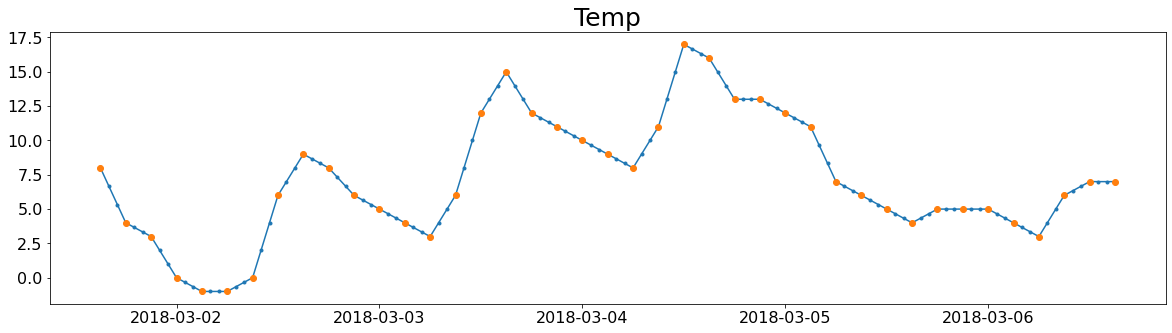

In [60]:
plt.figure(figsize=(20,5))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("Temp",fontsize=25)


days=5 #5일치만 시각화
plt.plot(ulsan_fcst_all_inter.loc[:24*days, 'Forecast_time'], ulsan_fcst_all_inter.loc[:24*days, 'Temperature'], '.-')
plt.plot(ulsan_fcst_all.loc[:24*days, 'Forecast_time'], ulsan_fcst_all.loc[:24*days, 'Temperature'], 'o')

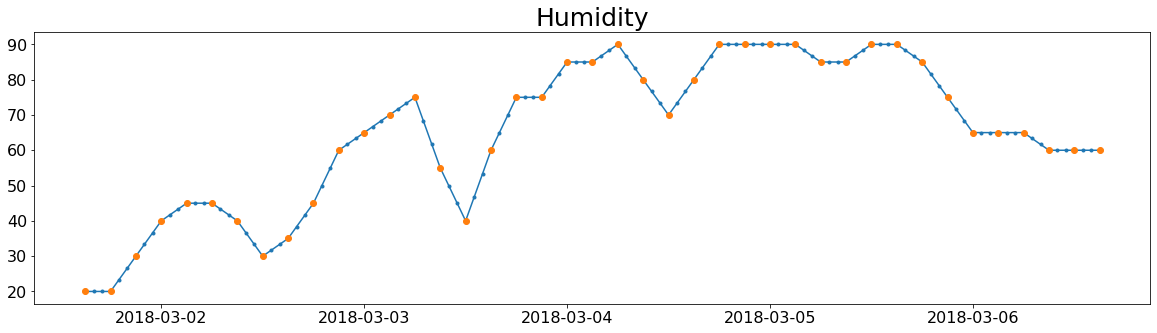

In [61]:
plt.figure(figsize=(20,5))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("Humidity",fontsize=25)


days=5 #5일치만 시각화
plt.plot(ulsan_fcst_all_inter.loc[:24*days, 'Forecast_time'], ulsan_fcst_all_inter.loc[:24*days, 'Humidity'], '.-')
plt.plot(ulsan_fcst_all.loc[:24*days, 'Forecast_time'], ulsan_fcst_all.loc[:24*days, 'Humidity'], 'o')

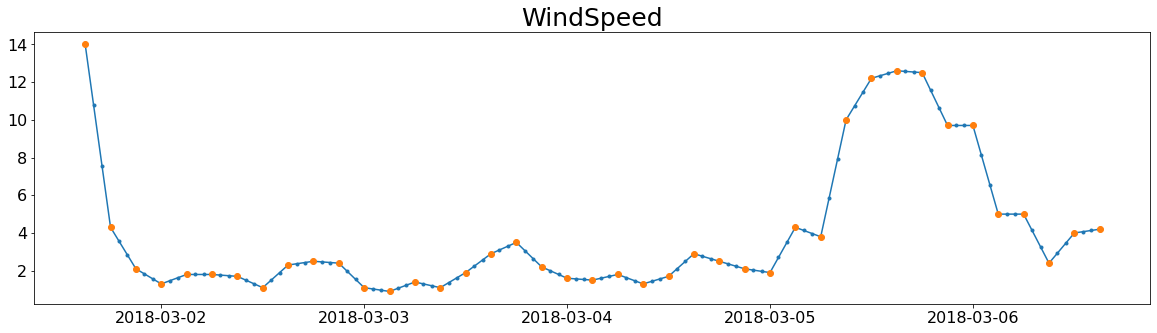

In [62]:
plt.figure(figsize=(20,5))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("WindSpeed",fontsize=25)


days=5 #5일치만 시각화
plt.plot(ulsan_fcst_all_inter.loc[:24*days, 'Forecast_time'], ulsan_fcst_all_inter.loc[:24*days, 'WindSpeed'], '.-')
plt.plot(ulsan_fcst_all.loc[:24*days, 'Forecast_time'], ulsan_fcst_all.loc[:24*days, 'WindSpeed'], 'o')

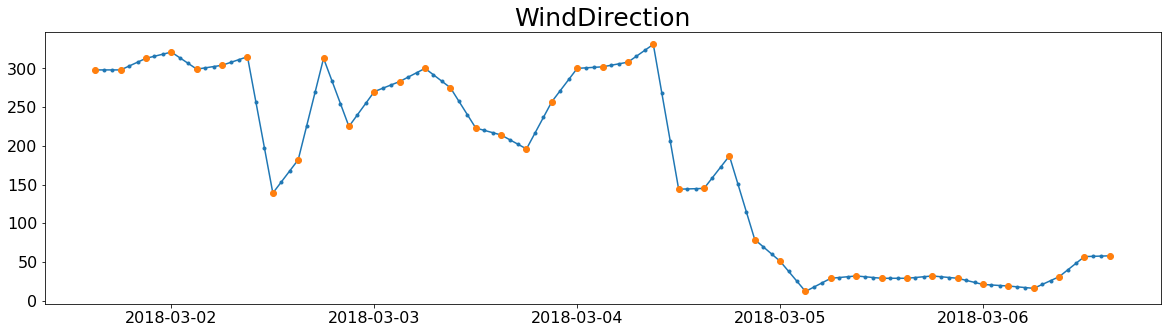

In [63]:
plt.figure(figsize=(20,5))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("WindDirection",fontsize=25)


days=5 #5일치만 시각화
plt.plot(ulsan_fcst_all_inter.loc[:24*days, 'Forecast_time'], ulsan_fcst_all_inter.loc[:24*days, 'WindDirection'], '.-')
plt.plot(ulsan_fcst_all.loc[:24*days, 'Forecast_time'], ulsan_fcst_all.loc[:24*days, 'WindDirection'], 'o')

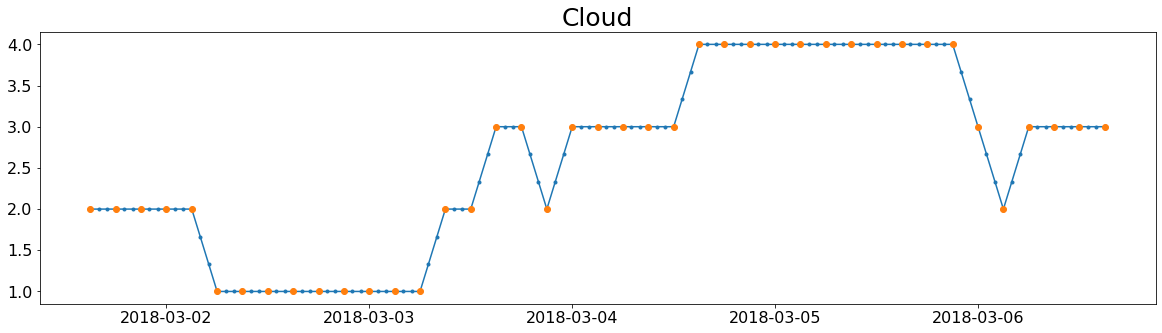

In [64]:
plt.figure(figsize=(20,5))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("Cloud",fontsize=25)


days=5 #5일치만 시각화
plt.plot(ulsan_fcst_all_inter.loc[:24*days, 'Forecast_time'], ulsan_fcst_all_inter.loc[:24*days, 'Cloud'], '.-')
plt.plot(ulsan_fcst_all.loc[:24*days, 'Forecast_time'], ulsan_fcst_all.loc[:24*days, 'Cloud'], 'o')

In [65]:
ulsan_fcst.describe()

,Temperature,Humidity,WindSpeed,WindDirection,Cloud
count,8788.000000,8788.000000,8788.000000,8788.000000,8788.000000
mean,15.057795,67.365157,3.536299,198.292899,2.441966
std,8.380721,19.499003,2.703466,113.774384,1.233121
min,-12.000000,5.000000,0.000000,0.000000,1.000000
25%,9.000000,55.000000,1.900000,68.000000,1.000000
50%,16.000000,70.000000,2.900000,229.000000,3.000000
75%,22.000000,85.000000,4.200000,300.000000,4.000000
max,35.000000,100.000000,36.099998,360.000000,4.000000


In [66]:
ulsan_fcst_all_inter.describe()

,Temperature,Humidity,WindSpeed,WindDirection,Cloud
count,26314.000000,26314.000000,26314.000000,26314.000000,26314.000000
mean,15.070331,67.365851,3.534544,198.455309,2.439842
std,8.338909,19.199271,2.651062,109.695454,1.203670
min,-12.000000,5.000000,0.000000,0.000000,1.000000
25%,9.000000,53.333333,1.933333,77.000000,1.000000
50%,15.666667,70.000000,2.900000,228.666667,2.666667
75%,22.000000,83.333333,4.200000,297.000000,3.666667
max,35.000000,100.000000,36.099998,360.000000,4.000000


## 원본 데이터와 단위를 맞춰준다(특히 Cloud)

In [67]:
ulsan_fcst_all_inter['Cloud']=round(ulsan_fcst_all_inter['Cloud'])
ulsan_fcst_all_inter['Temperature']=round(ulsan_fcst_all_inter['Temperature'])
ulsan_fcst_all_inter['Humidity']=round(ulsan_fcst_all_inter['Humidity'])
ulsan_fcst_all_inter['WindDirection']=round(ulsan_fcst_all_inter['WindDirection'])
ulsan_fcst_all_inter['WindSpeed']=round(ulsan_fcst_all_inter['WindSpeed'],1)




In [68]:
ulsan_fcst_all_inter.describe()

,Temperature,Humidity,WindSpeed,WindDirection,Cloud
count,26314.000000,26314.000000,26314.000000,26314.000000,26314.000000
mean,15.070229,67.365851,3.534544,198.455309,2.439842
std,8.341931,19.199373,2.651119,109.695937,1.209692
min,-12.000000,5.000000,0.000000,0.000000,1.000000
25%,9.000000,53.000000,1.900000,77.000000,1.000000
50%,16.000000,70.000000,2.900000,229.000000,3.000000
75%,22.000000,83.000000,4.200000,297.000000,4.000000
max,35.000000,100.000000,36.100000,360.000000,4.000000


In [69]:
ulsan_fcst_all_inter.to_csv('ulsan_fcst_linear.csv',index=False)